# Importing packages

In [1]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import TreeSearch
from pgmpy.sampling import BayesianModelSampling
from pgmpy.inference.bn_inference import BayesianModelProbability

import pandas as pd
import numpy as np
from phik import resources
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt
import fnmatch

In [7]:
# Display the dataframe
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

# Loading Data

In [8]:
choice_2021 = pd.read_excel('data/2021.xlsx', sheet_name='Resultaten')
choice_2021.head()

,Basisschool advies,Lotnummer,Geplaatst op,Positie,Voorrang/Hardheid eerste voorkeur,Voorkeur 1,Voorkeur 2,Voorkeur 3,Voorkeur 4,Voorkeur 5,Voorkeur 6,Voorkeur 7,Voorkeur 8,Voorkeur 9,Voorkeur 10,Voorkeur 11,Voorkeur 12,Voorkeur 13,Voorkeur 14,Voorkeur 15,Voorkeur 16,Voorkeur 17,Voorkeur 18,Voorkeur 19,Voorkeur 20,Voorkeur 21
0,vmbo-t/havo,7389,Niet geplaatst,-,-,Spinoza20first - v.a. vmbo-t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,vmbo-b,7742,Niet geplaatst,-,-,Clusius College - v.a. vmbo-b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,havo,129,Alasca - v.a. havo,1,Hardheidsclausule,Alasca - v.a. havo,Fons Vitae Lyceum - v.a. havo,Metis Montessori Lyceum - Technasium havo/vwo - v.a. havo,St. Nicolaaslyceum - v.a. havo,Hervormd Lyceum Zuid - v.a. havo,Vinse School - v.a. vmbo-t,Spinoza20first - v.a. vmbo-t,Montessori Lyceum Amsterdam - v.a. havo,Bernard Nieuwentijt College (Monnickendam) - v.a. havo,Berlage Lyceum - Tweetalig - v.a. havo,Geert Groote College - v.a. havo,Gerrit van der Veen College - v.a. havo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,havo/vwo,7606,Alasca - v.a. havo,1,Hardheidsclausule,Alasca - v.a. havo,IVKO - v.a. havo,Metis Montessori Lyceum - Coderclass of Metisprofiel havo/vwo - v.a. havo,Geert Groote College - v.a. havo,Berlage Lyceum - Tweetalig - v.a. havo,Gerrit van der Veen College - v.a. havo,Spinoza Lyceum - v.a. havo,Spinoza20first - v.a. vmbo-t,Vinse School - v.a. vmbo-t,St. Nicolaaslyceum - v.a. havo,De nieuwe Havo - v.a. havo,Hervormd Lyceum Zuid - v.a. havo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,havo/vwo,109,Alasca - v.a. havo,2,-,Metis Montessori Lyceum - Technasium havo/vwo - v.a. havo,Alasca - v.a. havo,Spinoza20first - v.a. vmbo-t,Metis Montessori Lyceum - Coderclass of Metisprofiel havo/vwo - v.a. havo,Fons Vitae Lyceum - v.a. havo,Lumion - v.a. havo,Spinoza Lyceum - v.a. havo,Montessori Lyceum Amsterdam - v.a. havo,Cartesius Lyceum - v.a. havo,St. Nicolaaslyceum - Tweetalig Onderwijs - v.a. havo,Spinoza Lyceum - Muziekplus - v.a. havo,Pieter Nieuwland College - v.a. havo,Cartesius Lyceum - Kansrijk VWO - havo/vwo,Vinse School - v.a. vmbo-t,Spinoza Lyceum - Kansrijk VWO - havo/vwo,Geert Groote College - v.a. havo,NaN,NaN,NaN,NaN,NaN


In [10]:
cols = choice_2021.columns
process_cols = fnmatch.filter(cols, "Voorkeur ?")
process_cols

['Voorkeur 1',
 'Voorkeur 2',
 'Voorkeur 3',
 'Voorkeur 4',
 'Voorkeur 5',
 'Voorkeur 6',
 'Voorkeur 7',
 'Voorkeur 8',
 'Voorkeur 9']

# Correlation Matrix

In [12]:
choice_2021['Basisschool advies'].unique()

array(['vmbo-t/havo', 'vmbo-b', 'havo', 'havo/vwo', 'vwo', 'vmbo-b/k',
       'vmbo-k', 'vmbo-t'], dtype=object)

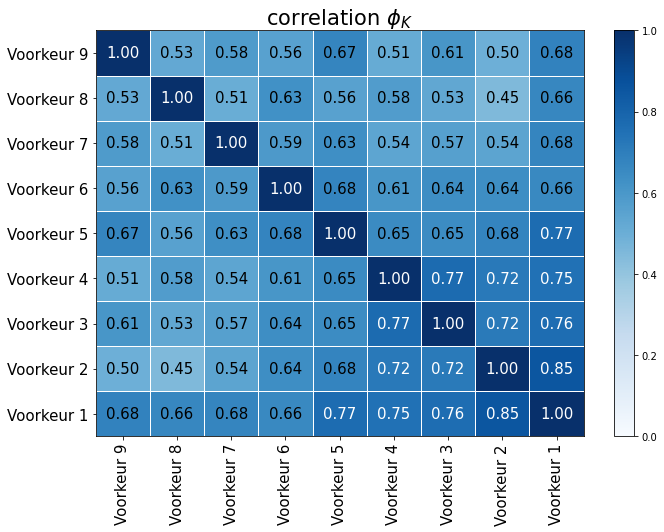

In [13]:
phik_overview = choice_2021[choice_2021['Basisschool advies'] == 'vwo'][process_cols].phik_matrix()

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(10,7.5))
plt.tight_layout()

# Building DAG

In [15]:
df = choice_2021[process_cols + ['Advies']].copy()

In [16]:
df.fillna("NaS", inplace=True)

In [17]:
# "tan" bayesian network needs string column names
est = TreeSearch(df, root_node='Voorkeur 1')
dag = est.estimate(
    estimator_type='tan',
    class_node='Advies',
    show_progress=True,
    # edge_weights_fn=self.edge_weights_fn
)

Building tree: 100%|████████████████████████████████████████████████████████████████████████████| 45/45.0 [00:00<00:00, 95.26it/s]


In [18]:
dag.edges()

OutEdgeView([('Voorkeur 1', 'Voorkeur 2'), ('Voorkeur 2', 'Voorkeur 3'), ('Voorkeur 3', 'Voorkeur 4'), ('Voorkeur 4', 'Voorkeur 5'), ('Voorkeur 5', 'Voorkeur 6'), ('Voorkeur 6', 'Voorkeur 7'), ('Voorkeur 7', 'Voorkeur 8'), ('Voorkeur 8', 'Voorkeur 9'), ('Advies', 'Voorkeur 1'), ('Advies', 'Voorkeur 2'), ('Advies', 'Voorkeur 3'), ('Advies', 'Voorkeur 4'), ('Advies', 'Voorkeur 5'), ('Advies', 'Voorkeur 6'), ('Advies', 'Voorkeur 7'), ('Advies', 'Voorkeur 8'), ('Advies', 'Voorkeur 9')])

# Fitting Bayesian Model to DAG

In [19]:
# model the conditional probabilities
bn = BayesianModel(dag.edges())
bn.fit(df)
# initialize sampler with fitted model
bn_sampler = BayesianModelSampling(bn)
bn_prob = BayesianModelProbability(bn)
# bn_ordering = [str(i) for i in range(X_discrete.shape[1])]

### Generating synthetic data from Bayesian sampler

In [20]:
df_gen = bn_sampler.forward_sample(size=10000)

Generating for node: Voorkeur 1:   0%|                                                                     | 0/10 [00:00<?, ?it/s]/Users/m.tasnimuva.nl/opt/anaconda3/envs/synth/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"
Generating for node: Voorkeur 9: 100%|████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.47it/s]


In [24]:
bn.get_cpds('Voorkeur 1')

<TabularCPD representing P(Voorkeur 1:142 | Advies:12) at 0x7fa3cdb56290>

In [25]:
df_gen

,Voorkeur 1,Voorkeur 2,Voorkeur 3,Voorkeur 4,Voorkeur 5,Voorkeur 6,Voorkeur 7,Voorkeur 8,Voorkeur 9,Advies
0,Het 4E Gymnasium vwo,Het Amsterdams Lyceum vwo,Het 4E Gymnasium vwo,Cartesius Lyceum vwo,Hyperion Lyceum vwo,Spinoza Lyceum atheneum - muziekplus vwo,Cygnus Gymnasium vwo,St. Nicolaaslyceum - tweetalig onderwijs vwo,Cygnus Gymnasium vwo,vwo
1,"Sweelinck College vmbo-t ±lwoo, vmbo-t/havo, havo","Berlage Lyceum - tweetalig onderwijs vmbo-t, v...","Geert Groote College vmbo-t, vmbo-t/havo","Christelijke Sgm Buitenveldert vmbo-t, vmbo-t/...","Het Reinaert vmbo-t ± lwoo, vmbo-t/havo",NaS,NaS,NaS,NaS,vmbo - theoretisch
2,Het Amsterdams Lyceum vwo,Fons Vitae Lyceum vwo,Pieter Nieuwland College vwo,Metis Montessori Lyceum vwo,Geert Groote College vwo,NaS,NaS,NaS,NaS,vwo
3,"Panta Rhei - game & technologieklas vmbo-b, vm...","Panta Rhei vmbo-b, vmbo-b/k, vmbo-k, vmbo-t ±l...","Scholengemeenschap Reigersbos vmbo-k, vmbo-t, ...",IJburg College 1 vmbo-k,"Stelle 2.0 vmbo-b, vmbo-b/k, vmbo-k ±lwoo",NaS,NaS,NaS,NaS,vmbo - kader
4,Vossius Gymnasium vwo,Cygnus Gymnasium vwo,Hervormd Lyceum Zuid - universalis vwo,Hervormd Lyceum Zuid vwo,Fons Vitae Lyceum vwo,Ignatiusgymnasium vwo,Fons Vitae Lyceum vwo,Hervormd Lyceum Zuid - universalis vwo,Het Amsterdams Lyceum vwo,vwo
...,...,...,...,...,...,...,...,...,...,...
9995,"Spinoza Lyceum havo, havo/vwo","Spinoza Lyceum - muziekplus havo, havo/vwo","St. Nicolaaslyceum havo, havo/vwo","Pieter Nieuwland College havo, havo/vwo","Fons Vitae Lyceum havo, havo/vwo","Cartesius Lyceum havo, havo/vwo","Cartesius 2 havo, havo/vwo",NaS,NaS,havo
9996,"Mediacollege Amsterdam vmbo-t ±lwoo, vmbo-t/havo","Panta Rhei - game & technologieklas vmbo-b, vm...","Panta Rhei - kookklas vmbo-b, vmbo-b/k, vmbo-k...","Panta Rhei - sportklas vmbo-b, vmbo-b/k, vmbo-...","Sweelinck College vmbo-t ±lwoo, vmbo-t/havo, havo","Bredero Mavo - vox-klassen vmbo-t ± lwoo, vmbo...","Montessori College Oost vmbo-b, vmbo-b/k, vmbo...","Huygens College vmbo-b, vmbo-b/k, vmbo-k, vmbo...",NaS,vmbo - theoretisch + lwoo
9997,"Hubertus & Berkhoff vakschool vmbo-b, vmbo-b/k...","Panta Rhei vmbo-b, vmbo-b/k, vmbo-k, vmbo-t ±l...","Zuiderlicht College vmbo-b, vmbo-b/k, vmbo-k, ...","Huygens College vmbo-b, vmbo-b/k, vmbo-k, vmbo...","Amsterdams Beroepscollege Noorderlicht vmbo-b,...","Zuiderlicht College vmbo-b, vmbo-b/k, vmbo-k, ...",NaS,NaS,NaS,vmbo - basis + lwoo
9998,Vossius Gymnasium vwo,Barlaeus Gymnasium vwo,Cygnus Gymnasium vwo,Het Amsterdams Lyceum vwo,Spinoza Lyceum atheneum vwo,NaS,NaS,NaS,NaS,vwo


#### Testing for duplicate column values

In [26]:
count=0
for index, row in df_gen.iterrows():
    k = row[~np.isin(row, ['NaS'])]
    #how many rows will have non-unique columns?
    if(len(k.unique()) < len(k)):
        count+=1
count

5454